# Проектная работа 3 Курс 2021/2022

# Идентификация фунции фитнеса методами машинного обучения

# Этап 0 | Постановка задачи | Ожидаемый результат

Цель проекта: Восстановление функции фитнеса, с помощью различных методов машинного обучения

План работы:
- Теоретический модуль
   1. Для начала стоит изучить доступную литературу по данному предмету (список находится в конце Этапа 0)
   2. Изучить базовые возможности и синтаксис языка программирования Python
   3. Создание и исследование математической модели
   4. Ознакомление с возможностями Jupiter Notebook
- Практический модуль
   1. Создание обучающей выборки
   2. Обучение классификаторов
   3. Проверка качества классификатора
   4. Дополнительная проверка качества классификатора
   5. Правка багов и аномалий (тестирование и исправление ошибок)
   6. Написание финального отчета по окончаю проекта

Краткое изложение всей теоретической базы (*За более подробными данными в список литературы*)

Функция фитнеса - это функция биологической приспособленности
- Благодаря выявлению функции фитнеса есть возможность найти оптимальное решение
- Следовательно найти оптимальную стратегию поведения

Фитнес всегда определятеся по разному, но по всем (**моим**) наблюдениям это какая-то функция, которая зависит от различных параметров. Эти параметры (*Макропараметры*) в данной проектной работе представляют из себя описание окружающей среды, количество хищников, естественную смертность и тд. (*Более подробно в Этапе 1)

> Читатель: Почему объектом изучения является Зоопланктон?

> Breketov: Ну потому что это хорошо изученные организмы, + они перемещаются по всеми известной синусоиде (**Ни в коем случае не путать с косинусоидой о которой как оказалось никто не знает**)

> Breketov: Кстати говоря их перемещения носят отдельной научное название - суточные вертикальные миграции (СВМ) или на english (DVM - Diel vertical migration)

> Breketov: Ну а еще если переводить это в математику, то окажется, что выходит довольно простая система, с большим количесвом эмпирических данных

> Читатель: Я понял, можешь больше не продолжать, душнила.

> Высший разум: Рыбка плавать вверх и вниз и вкусно получать (Это шутка)

Ну и после небольших бед с б**кой^ можно поговорить об обучающей выборке:
- Выборка - конечный отбор чего-то с известной принадлежностью к одному из двух множеств
- И в работе необходимо будет создать обучающую выборку, в которой представлены признаки и принадлежность к определенному классу

В проектной работе в качестве стратегий будут две синусоиды (**НЕ КОСИНУСОИДЫ**), где одна относится к молодым особям, ну то есть к джунам, а другая к взрослым, ну или к сеньорам. Ну и касаемо ранжирования стоит сказать что в данном случае у нас будут сравниваться i-ый элемент с со всеми j-ими.

В проекте мы реализуем 2 главных метода классификации:
- Метод опорных векторов или на english мове (SVM)
- Фишеровский дискриминант или на мове (LDA)

Ну и в итоге планируется получить как можно более точные и правдоподобные результаты (*по крайней мере чтобы не оказалось так, что хищники увеличили популяцию зооплантончика нашего ненаглядного*)

Чорт, чуть не забыл про литературу нашу любимую:

- [*Exploring Evolutionary Fitness in Biological Systems Using Machine Learning Methods*](https://www.mdpi.com/1099-4300/23/1/35/htm)
- [*Лекции от Вышки по МО*](https://github.com/esokolov/ml-course-hse)
- [*Почему только 2, а потому что все легко гуглится мы же в 21 веке живем чувак) Это кстати тоже ссылка можешь перейти*](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки (Теория)

По реальным наблюдениям мы имее следующие коэффициенты для каждого поколения:

                                                Для молодых особей:
$
\alpha_J = 0.0016,
\beta_J = 0.0000007,
\gamma_J = 0.00008,
\delta_J = 0.000016
$

                                                Для взрослых особей:
$
\alpha_A = 0.006,
\beta_A = 0.000000075,
\gamma_A = 0.004,
\delta_A = 0.00006
$

Пусть имеют место параметризации функций окружающей среды:

- $E(x)$ - пространственное распределение пищи по вертикальной координате $x$

- $S(x)$ - пространственное распределение хищников по вертикальной координате $x$

- $S(t)$ - активность хищников

- $G(x)$ - совокупность дополнительных факторов окружающей среды, типо перепадов температур, радиция и тд.

И нам известны параметры $D$ - максимальная глубина и $D_0$ - оптимальная глубина. А так же $\sigma_1 = 1$, $\sigma_2 = 1$
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$ стратегии две стадии жизнии зоопланктона: молодых и взрослых особей
$$
x_{J} = A_{J} + B_{J}cos(2\pi\tau)\ \ \ \ \ \ x_{A} = A_{A} + B_{A}cos(2\pi\tau)
$$

Где мы должны взять ограничения для параметров A и B такие что: $ -D < A < 0$, $|B| < min(A + D, -A)$

Ключевыми макропараметрами являются:

$ M_1 $ и $ М_5 $ - количество потребляемой пищи в сутки

$ M_2 $ и $ М_6 $ - суточная смертность от хищников

$ M_3 $ и $ М_7 $ - метаболическая стоимость вертикальной миграции

$ M_4 $ и $ М_8 $ - смертность зоопланктона от неблагоприятных условий среды

                Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{Ji}(\tau))^2d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{Ji}(\tau))d\tau
$$
                Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{Ai}(\tau))^2d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{Ai}(\tau))d\tau
$$

Известная функция фитнеса: $ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

С коэффициентами:

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $ - воспроизводство 

$ s = \gamma_{A}M_6 $ - уровень смертности молодых особей

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $ - созревание молодых особей

$ q = \gamma_{J}M_2 $ - уровень смертности взрослых особей

Теперь с полностью подготовленной математической частью мы создаем с помощью рандомной генерации в заданных диапазонах параметры $A$ и $B$ для каждой стадии, количество генерируемых стратегий выберем небольшим, чтобы не сильно нагружать оборудование. Далее мы в интегралы всех макропараметров подставляем известные значения и вычисляем их после чего имеем более простую формулу нахождения этих макропараметров:

$M_1 = \sigma_1(A_J + D)$

$M_2 = -\sigma_2(A_J+ D + B_J/2)$

$M_3 = -2(\pi B_J)^2$

$M_4 = -((A_J + D_0)^2 + B_J^2/2)$

$M_5 = \sigma_1(A_A + D)$

$M_6 = -\sigma_2(A_A + D + B_A/2)$

$M_7 = -2(\pi B_A)^2$

$M_8 = -((A_A + D_0)^2 + B_A^2/2)$

На следующем шаге мы считаем параметры $s,p,q,r$ и соответственно найти значения функции фитнеса $J$ и стоит добавить, что если подкоренное выражение окажется равным нулю, то мы заменим значение фитнеса не комплексным числом, а нулем. Далее мы считаем пары стратегий с известными значениями фитнеса для каждой стратегии и если $M_i(\upsilon) - M_j(\omega) < 0 $, то мы идентифицируем эту точку в класс $-1$, иначе мы определим ее в класс $1$. После у нас будет готова обучающая выборка для классификаторов и уже разделив ее на тестовую и обучающую мы сможем обучить наши классификаторы. На выходе они нам дадут 44 числа, которые являются коэффициентами при макропараметрах в неизвесной функции фитнеса:

$F = \sum_{i=1}^8 \lambda_i M_i + \sum_{i=1}^8 \sum_{j=1}^8 \lambda_{ij} M_i M_j$, где  $\lambda_{ij} =  \lambda_{ji}$

Концом данного этапа станет подсчет точности классификатора по с помощью стандартного подхода и логарифмической потери, а также создание двумерных и трехмерных графиков с разделяющими гиперплоскостями полученными с помощью классификаторов SMV и LDA.

## 2. Реализация

### 2.1 Исходные данные

In [1]:
#lam_M = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8']
#lam_M2, lam_MM = [], []
#for i in range(0, 8):
#    for j in range(0, 8):
#        if i == j:
#            lam_M2.append(lam_M[i]+lam_M[j])
#        else:
#            continue
#for i in range(1, 8):
#    for j in range(0, i):
#        lam_MM.append(lam_M[i]+lam_M[j])
#lam = lam_M + lam_M2 + lam_MM
#lam

In [2]:
# Обозначим эмпирические данные молодых и взрослых особей
# И затащим их в один массив
# lam = [alpha_j, gamma_j, betta_j, delta_j, alpha_a, gamma_a, betta_a, delta_a]
lam_M = [0.0016, 0.00008, 0.0000007, 0.000016, 0.006, 0.004, 0.000000075, 0.00006]
lam_M2, lam_MM = [], []
for i in range(0, 8):
    for j in range(0, 8):
        if i == j:
            lam_M2.append(lam_M[i]*lam_M[j])
        else:
            continue
for i in range(1, 8):
    for j in range(0, i):
        lam_MM.append(lam_M[i]*lam_M[j])
lam = lam_M + lam_M2 + lam_MM
# Сформируем вектор дополнительных данных 
sigma1, sigma2, D, D0 = 1, 1, 120, 70

# Количество генерируемых стратегий
Nmax = 40

### 2.2 Генерации стратегий

In [3]:
# Генерация параметров для стратегий
# Запись параметров в data_strat
import random as rn
import pandas as pd

def strategy(Nmax):
    def rand_strat_A():
        A = []
        for i in range(0, Nmax):
            a = rn.randint(-D*100, 0)
            A.append(a)
        return A
    def rand_strat_B(a):
        A, B = [], []
        for i in range(0, Nmax):
            b = rn.randint(-min(-a[i], a[i] + D*100), 0)
            A.append(a[i]/100)
            B.append(b/100)
            A.append(a[i]/100)
            B.append(-b/100)
        return A, B

    a = rand_strat_A()
    A, B = rand_strat_B(a)
    data_strat1 = {'Aj': A, 'Bj': B}
    data1 = pd.DataFrame(data = data_strat1)
    a = rand_strat_A()
    A, B = rand_strat_B(a)
    data_strat2 = {'Aa': A, 'Ba': B}
    data2 = pd.DataFrame(data = data_strat2)
    data = pd.concat([data1, data2], axis=1)
    data.to_csv("data_strat.csv", index=False)
    return data
    
data_strat = strategy(Nmax)
data_strat

,Aj,Bj,Aa,Ba
0,-9.96,-9.22,-97.41,-7.84
1,-9.96,9.22,-97.41,7.84
2,-116.77,-3.07,-87.15,-31.02
3,-116.77,3.07,-87.15,31.02
4,-60.52,-37.92,-65.84,-40.15
...,...,...,...,...
75,-99.71,5.55,-35.64,35.42
76,-39.24,-10.66,-69.71,-8.31
77,-39.24,10.66,-69.71,8.31
78,-61.90,-22.49,-51.14,-33.92


### 2.3 Подсчет макропараметров и создание выборки

In [4]:
# Подсчет макропараметров
# Запись их в data_macro
import pandas as pd
import numpy as np
from collections import defaultdict

def macroparams(data_strat):
   Aj = data_strat['Aj'].tolist()
   Bj = data_strat['Bj'].tolist()
   Aa = data_strat['Aa'].tolist()
   Ba = data_strat['Ba'].tolist()
   collect = defaultdict(list)
   collect_M = defaultdict(list)
   collect_MM = defaultdict(list)
   for i in range(len(data_strat)):
      collect['M1'].append(sigma1*(Aj[i] + D))
      collect['M5'].append(sigma1*(Aa[i] + D))

      collect['M2'].append(-sigma2*(Aj[i] + D + Bj[i]/2))
      collect['M6'].append(-sigma2*(Aa[i] + D + Ba[i]/2))

      collect['M3'].append(-2*(np.pi)*(np.pi)*Bj[i]*Bj[i])
      collect['M7'].append(-2*(np.pi)*(np.pi)*Ba[i]*Ba[i])
      
      collect['M4'].append(-((Aj[i] + D0)*(Aj[i] + D0) + (Bj[i]*Bj[i])/2))
      collect['M8'].append(-((Aa[i] + D0)*(Aa[i] + D0) + (Ba[i]*Ba[i])/2))

   for i in range(1, 9):
      for j in range(1, 9):
         if i == j == 1 or i == j == 5:
            Z = np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
            collect_M['M' + str(i) + 'M' + str(j)].append(list(Z))
         elif i == j:
            Z = -np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
            collect_M['M' + str(i) + 'M' + str(j)].append(list(Z))
         else:
            continue
   
   for i in range(2, 9):
      for j in range(1, i):
         if i == 5 and j == 1:
            Z = 2*np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
            collect_MM['M' + str(i) + 'M' + str(j)].append(list(Z))
         else:
            Z = -np.abs(2*np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)]))
            collect_MM['M' + str(i) + 'M' + str(j)].append(list(Z))
            
   data_macro = {}   
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      data['M' + str(i)] = collect['M' + str(i)]
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            data['M' + str(i) + 'M' + str(j)] = collect_M['M' + str(i) + 'M' + str(j)][0]
         else:
            continue
   for i in range(2, 9):
      for j in range(1, i):
         data['M' + str(i) + 'M' + str(j)] = collect_MM['M' + str(i) + 'M' + str(j)][0]
   data.to_csv("data_macro.csv", index=False)
   return data
data_macro = macroparams(data_strat)
data_macro

,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,M2M2,...,M7M4,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7
0,110.04,-105.430,-1677.998558,-3647.30580,22.59,-18.670,-1213.282313,-782.04090,12108.8016,-11115.484900,...,-8.850423e+06,-5.481609e+04,-4.530396e+04,-172111.561272,-164901.144174,-2.624527e+06,-5.704685e+06,-35332.607862,-29201.407206,-1.897673e+06
1,110.04,-114.650,-1677.998558,-3647.30580,22.59,-26.510,-1213.282313,-782.04090,12108.8016,-13144.622500,...,-8.850423e+06,-5.481609e+04,-6.432823e+04,-172111.561272,-179321.978370,-2.624527e+06,-5.704685e+06,-35332.607862,-41463.808518,-1.897673e+06
2,3.23,-1.695,-186.040069,-2192.14535,32.85,-17.340,-18993.864173,-775.24270,10.4329,-2.873025,...,-8.327462e+07,-1.247897e+06,-6.587072e+05,-5008.067842,-2628.072753,-2.884524e+05,-3.398889e+06,-50933.445390,-26885.416836,-2.944971e+07
3,3.23,-4.765,-186.040069,-2192.14535,32.85,-48.360,-18993.864173,-775.24270,10.4329,-22.705225,...,-8.327462e+07,-1.247897e+06,-1.837087e+06,-5008.067842,-7388.062931,-2.884524e+05,-3.398889e+06,-50933.445390,-74981.473944,-2.944971e+07
4,59.48,-40.520,-28383.529452,-808.83360,54.16,-34.085,-31820.048721,-823.31685,3537.8704,-1641.870400,...,-5.147425e+07,-3.446748e+06,-2.169173e+06,-97941.772476,-66721.597524,-4.673728e+07,-1.331853e+06,-89181.681192,-56125.509664,-5.239596e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,20.29,-23.065,-608.016979,-898.08535,84.36,-102.070,-24764.345518,-1807.89780,411.6841,-531.994225,...,-4.448099e+07,-4.178240e+06,-5.055393e+06,-73364.492724,-83398.325514,-2.198465e+06,-3.247293e+06,-305028.516816,-369064.256892,-8.954281e+07
76,80.76,-75.430,-2243.076836,-1002.99540,50.29,-46.135,-1363.112777,-34.61215,6522.1776,-5689.684900,...,-2.734392e+06,-1.371019e+05,-1.257744e+05,-5590.554468,-5221.588949,-1.552754e+05,-6.943165e+04,-3481.290047,-3193.663081,-9.436053e+04
77,80.76,-86.090,-2243.076836,-1002.99540,50.29,-54.445,-1363.112777,-34.61215,6522.1776,-7411.488100,...,-2.734392e+06,-1.371019e+05,-1.484294e+05,-5590.554468,-5959.519987,-1.552754e+05,-6.943165e+04,-3481.290047,-3768.917014,-9.436053e+04
78,58.10,-46.855,-9984.093786,-318.51005,68.86,-51.900,-22711.270410,-930.98280,3375.6100,-2195.391025,...,-1.446754e+07,-3.127796e+06,-2.357430e+06,-108180.201360,-87242.398188,-1.859004e+07,-5.930548e+05,-128214.951216,-96636.014640,-4.228760e+07


In [5]:
# Подсчет фитнесса
# Запись в data_fit_macro
import pandas as pd
from collections import defaultdict

def fitness():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()
   M3 = data_macro['M3'].tolist()
   M4 = data_macro['M4'].tolist()
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   J = []
   for i in range(len(data_strat)):
      p = lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]
      q = lam[1]*M2[i]
      r = lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]
      s = lam[5]*M6[i]
      
      if ((4*r*p + (p + q - s)**2) < 0):
         J.append(0)
      else:
         j = -s - p - q + (4*r*p + (p + q - s)**2)**0.5
         J.append(j)
   data = pd.read_csv('data_macro.csv')
   data.insert(0, 'J', J)
   #data = data.loc[data.J !=0]
   #data = data.reset_index(drop=True)
   data.to_csv('data_fit_macro.csv', index=False)
   return data

In [6]:
# Классификатор попарных стратегий
def classificator(differ):
   if differ[0] < 0:
      return -1
   else:
      return 1
# Подсчет попарных стратегий
# Запись в data_fit_macro_target
def data_class():
   data_fit_macro = fitness()
   target = []
   for i in range(len(data_fit_macro.index)):
      for j in range(i + 1, len(data_fit_macro.index)):
         differ1_ = data_fit_macro.loc[i] - data_fit_macro.loc[j]
         differ2_ = data_fit_macro.loc[j] - data_fit_macro.loc[i]
         target1_ = classificator(differ1_)
         target2_ = classificator(differ2_)
         target.append(differ1_.append(pd.Series(target1_, index =['target'])))
         target.append(differ2_.append(pd.Series(target2_, index =['target'])))
   data = pd.DataFrame(data = target)
   data.to_csv('data_fit_macro_target.csv', index=False)
   return data
data_fit_macro_target = data_class()
data_fit_macro_target


,J,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,...,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,target
0,-0.053461,0.00,9.220,0.000000,0.00000,0.00,7.840,0.000000,0.00000,0.0000,...,0.000000e+00,1.902427e+04,0.000000,14420.834196,0.000000e+00,0.000000e+00,0.000000,12262.401312,0.000000e+00,-1.0
1,0.053461,0.00,-9.220,0.000000,0.00000,0.00,-7.840,0.000000,0.00000,0.0000,...,0.000000e+00,-1.902427e+04,0.000000,-14420.834196,0.000000e+00,0.000000e+00,0.000000,-12262.401312,0.000000e+00,1.0
2,0.239845,106.81,-103.735,-1491.958488,-1455.16045,-10.26,-1.330,17780.581861,-6.79820,12098.3687,...,1.193081e+06,6.134032e+05,-167103.493430,-162273.071421,-2.336075e+06,-2.305795e+06,15600.837528,-2315.990370,2.755204e+07,1.0
3,-0.239845,-106.81,103.735,1491.958488,1455.16045,10.26,1.330,-17780.581861,6.79820,-12098.3687,...,-1.193081e+06,-6.134032e+05,167103.493430,162273.071421,2.336075e+06,2.305795e+06,-15600.837528,2315.990370,-2.755204e+07,-1.0
4,-0.077046,106.81,-100.665,-1491.958488,-1455.16045,-10.26,29.690,17780.581861,-6.79820,12098.3687,...,1.193081e+06,1.791783e+06,-167103.493430,-157513.081243,-2.336075e+06,-2.305795e+06,15600.837528,45780.066738,2.755204e+07,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6315,-0.027326,-22.66,39.235,-7741.016950,684.48535,18.57,2.545,-21348.157633,-896.37065,-3146.5676,...,-2.990694e+06,-2.209001e+06,-102589.646892,-81282.878201,-1.843476e+07,-5.236231e+05,-124733.661169,-92867.097626,-4.219324e+07,-1.0
6316,-0.206081,22.66,-16.745,7741.016950,-684.48535,-18.57,31.375,21348.157633,896.37065,3146.5676,...,2.990694e+06,3.749733e+06,102589.646892,123158.484545,1.843476e+07,5.236231e+05,124733.661169,156024.970778,4.219324e+07,-1.0
6317,0.206081,-22.66,16.745,-7741.016950,684.48535,18.57,-31.375,-21348.157633,-896.37065,-3146.5676,...,-2.990694e+06,-3.749733e+06,-102589.646892,-123158.484545,-1.843476e+07,-5.236231e+05,-124733.661169,-156024.970778,-4.219324e+07,1.0
6318,-0.233407,0.00,22.490,0.000000,0.00000,0.00,33.920,0.000000,0.00000,0.0000,...,0.000000e+00,1.540733e+06,0.000000,41875.606344,0.000000e+00,0.000000e+00,0.000000,63157.873152,0.000000e+00,-1.0


In [7]:
# Нормируем макропараметры для увеличения скорости классификатора
# Запись нормированных данных в data_norm_with_target
import numpy as np
from collections import defaultdict

def macro_norm(data_param):
   target = data_param['target'].tolist()
   max_M = []
   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      tmp = max(np.abs(data_param['M' + str(i)]))
      max_M.append(tmp)
      Z = np.array(data_param['M' + str(i)])/tmp
      data['M' + str(i)] = Z
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            tmp = max(np.abs(data_param['M' + str(i) + 'M' + str(j)]))
            max_M.append(tmp)
            Z = np.array(data_param['M' + str(i) + 'M' + str(j)])/tmp
            data['M' + str(i) + 'M' + str(j)] = Z
         else:
            continue   
   for i in range(2, 9):
      for j in range(1, i):
         tmp = max(np.abs(data_param['M' + str(i) + 'M' + str(j)]))
         max_M.append(tmp)
         Z = np.array(data_param['M' + str(i) + 'M' + str(j)])/tmp
         data['M' + str(i) + 'M' + str(j)] = Z
   data['target'] = target
   data.to_csv("data_norm_with_target.csv", index=False)
   return data, max_M
   
data_norm, Max_M = macro_norm(data_fit_macro_target)
data_norm

,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,M2M2,...,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,target
0,0.000000,0.078726,0.000000,0.000000,0.000000,0.066721,0.000000,0.000000,0.000000,0.143778,...,0.00000,0.002666,0.000000,0.017104,0.000000,0.000000,0.000000,0.011256,0.000000,-1.0
1,0.000000,-0.078726,0.000000,0.000000,0.000000,-0.066721,0.000000,0.000000,0.000000,-0.143778,...,0.00000,-0.002666,0.000000,-0.017104,0.000000,0.000000,0.000000,-0.011256,0.000000,1.0
2,0.928218,-0.885753,-0.030226,-0.313209,-0.087610,-0.011319,0.468052,-0.001481,0.865130,-0.787406,...,0.21549,0.085949,-0.226320,-0.192470,-0.011930,-0.092113,0.014342,-0.002126,0.239603,1.0
3,-0.928218,0.885753,0.030226,0.313209,0.087610,0.011319,-0.468052,0.001481,-0.865130,0.787406,...,-0.21549,-0.085949,0.226320,0.192470,0.011930,0.092113,-0.014342,0.002126,-0.239603,-1.0
4,0.928218,-0.859540,-0.030226,-0.313209,-0.087610,0.252670,0.468052,-0.001481,0.865130,-0.786000,...,0.21549,0.251061,-0.226320,-0.186825,-0.011930,-0.092113,0.014342,0.042023,0.239603,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6315,-0.196924,0.335013,-0.156826,0.147329,0.158569,0.021659,-0.561964,-0.195313,-0.225005,0.369597,...,-0.54017,-0.309521,-0.138944,-0.096409,-0.094146,-0.020918,-0.114667,-0.085245,-0.366928,-1.0
6316,0.196924,-0.142979,0.156826,-0.147329,-0.158569,0.267010,0.561964,0.195313,0.225005,-0.184424,...,0.54017,0.525405,0.138944,0.146077,0.094146,0.020918,0.114667,0.143219,0.366928,-1.0
6317,-0.196924,0.142979,-0.156826,0.147329,0.158569,-0.267010,-0.561964,-0.195313,-0.225005,0.184424,...,-0.54017,-0.525405,-0.138944,-0.146077,-0.094146,-0.020918,-0.114667,-0.143219,-0.366928,1.0
6318,0.000000,0.192033,0.000000,0.000000,0.000000,0.288669,0.000000,0.000000,0.000000,0.185173,...,0.00000,0.215884,0.000000,0.049668,0.000000,0.000000,0.000000,0.057974,0.000000,-1.0


### 2.4 Проверка корреляции и распределения

<Figure size 720x720 with 0 Axes>

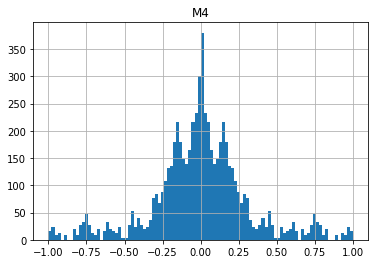

In [8]:
import matplotlib.pyplot as plt
histogram = data_norm[['M4']]
plt.figure(figsize=(10, 10))
histogram.hist(bins=100)
plt.show()

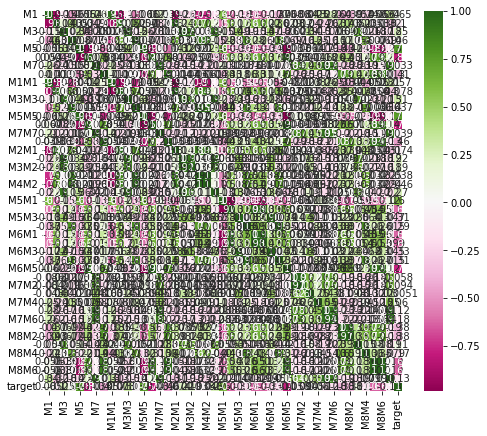

In [9]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

#correlation = data_norm[['M' + str(i) for i in range(1, 9)]]
correlation = data_norm
plt.figure(figsize=(8, 7))
sea.heatmap(correlation.corr(), annot=True, cmap="PiYG")
plt.savefig('Matrix_corr.jpg')

### 2.5 Реализация методов машинного обучения

In [10]:
# Разедляем данные на обучающую и тестовую выборки
import pandas as pd
from sklearn.model_selection import train_test_split

X = data_norm.drop('target', axis=1)
y = data_norm['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [11]:
# Реализуем SVM
from sklearn.svm import SVC
SVC_model = SVC(kernel= 'linear')
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
SVC_coef = SVC_model.coef_.tolist()
SVC_coef = SVC_coef[0]

In [12]:
# Реализуем LDA
from sklearn import discriminant_analysis
LDA_model = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_prediction = LDA_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
LDA_coef = LDA_model.coef_.tolist()
LDA_coef = LDA_coef[0]

In [13]:
# Избавляемся от нормализованных коэффициентов
machine_SVM = [SVC_coef[i]/Max_M[i] for i in range(len(SVC_coef))]
machine_LDA = [LDA_coef[i]/Max_M[i] for i in range(len(LDA_coef))]

In [14]:
# Подсчет точности SVM и LDA
from sklearn.metrics import accuracy_score
from sklearn import model_selection
print('Точность классификатора:')
print('     SVM: ', accuracy_score(SVC_prediction, y_test)*100)
print('     LDA: ', accuracy_score(LDA_prediction, y_test)*100)

SVM = model_selection.cross_val_score(SVC_model, X, y)
LDA = model_selection.cross_val_score(LDA_model, X, y)
print('Logloss:')
print('     SVM: ', SVM.std())
print('     LDA: ', LDA.std())



Точность классификатора:
     SVM:  98.65506329113924
     LDA:  98.8132911392405
Logloss:
     SVM:  0.005375091060589552
     LDA:  0.03362853646814836


<AxesSubplot:>

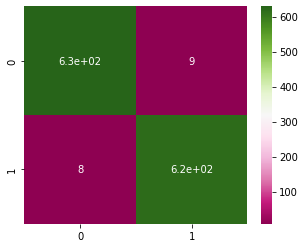

In [15]:
# Подсчет матрицы ошибок
from sklearn.metrics import confusion_matrix
import seaborn as sea
plt.figure(figsize=(5, 4))
# cnf_matrix = confusion_matrix(y_test, LDA_prediction)
cnf_matrix = confusion_matrix(y_test, SVC_prediction)
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")

### 2.6 Графики 

#### 2.6.1 Двумерные

In [16]:
# # Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(i + 1, len(X.columns)):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
#         plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='LDA')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

In [17]:
# # Вывод части графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(0, 8):
#     for j in range(i + 1, 7):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='x')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='.')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='Гиперплоскость созданная SVM')
#         plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='Гиперплоскость созданная LDA')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

#### 2.6.2 Трехмерные

In [18]:
# # Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(len(X.columns)):
#         for k in range(len(X.columns)):
#             if i == j or j == k or i == k:
#                 continue
#             u, v = np.mgrid[-1:1:20j, -1:1:20j]
#             fig = plt.figure(figsize=(10, 10))
#             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
#             ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
#             ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
#             ax.set_xlabel(X.columns[i])
#             ax.set_ylabel(X.columns[j])
#             ax.set_zlabel(X.columns[k])
#             plt.legend()
#             plt.grid()
#             plt.show()

In [19]:
# # Вывод части графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(0, 5):
#     for j in range(0, 4):
#         for k in range(0, 3):
#             if i == j or j == k or i == k:
#                 continue
#             u, v = np.mgrid[-1:1:20j, -1:1:20j]
#             fig = plt.figure(figsize=(10, 10))
#             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='x')
#             ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='.')
#             ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
#             ax.set_xlabel(X.columns[i])
#             ax.set_ylabel(X.columns[j])
#             ax.set_zlabel(X.columns[k])
#             plt.grid()
#             plt.show()

# Этап 2 | Проверка по Тейлору | Поиск оптимальной траектории | Финальная проверка

## 1. Теоретический модуль

Для проверки качества классификатора мы воспользуемся разложением по Тейлору до второго порядка функции $J$ в окрестности точки с наибольшим значением фитнеса, раскладывать будем по $s,p,q,r$. В качестве средний точки будем брать $s_0,p_0,q_0,r_0$, а подсчитанную производную в этой точке назовем $h$, тогда:

$J = h_ss + h_pp + h_qq + h_rr + h_{ss}s^2 + h_{pp}p^2 + h_{qq}q^2 + h_{rr}r^2 + h_{sp}sp + h_{sq}sq + h_{sr}sr + h_{pq}pq + h_{pr}pr + h_{qr}qr$

*Тут мы опустили из рассмотрения нулевую производную и прочие числа

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $

$ s = \gamma_{A}M_6 $

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $

$ q = \gamma_{J}M_2 $

Теперь подставив заместо $s,p,q,r$ их определения через макропараметры мы получим функцию зависимую от $M$ с какими-то коэффициентами и их мы сравним с $\lambda$ и проверим качество классификатора (Стоит сделать уточнение, что мы рассматриваем результаты только одного классификатора - SVM, так как LDA показал потерю точности при большом размере выборки и дальнейшая работа с ним дала бы слишком большие неточности) 

## 2. Проверка по Тейлору функции фитнеса J 

### 2.1 Вывод частных производных

Найдем все производные вплоть до 2 порядка, дифференцируя $J$ по частным производным $s,p,q,r$ 

$ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

                        Производные 1-го порядка:
$$
h_s = \frac{-p-q+s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1\ \ \ \ \ \ h_p = \frac{2r + p+q-s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1
$$
$$
h_q = \frac{p+q-s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1\ \ \ \ \ \ h_r = \frac{2p}{\sqrt[2]{4rp+(p+q-s)^2}}
$$

                        Производные 2-го порядка:
$$
h_{ss} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pp} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(2r+p+q-s)(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{qq} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{rr} = \frac{-4p^2}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$

                        Смешанные производные:
$$
h_{sp} = \frac{-1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(-p-q+s)(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{sq} = \frac{-1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(-p-q+s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{sr} = \frac{-2p(-p-q+s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pq} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(2r+p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pr} = \frac{2}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{2p(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{qr} = \frac{-2p(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$


### 2.2 Реализация проверок

In [20]:
# Считаем значения искомого фитнеса
import pandas as pd
import numpy as np

def middle_SPQR():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()
   M3 = data_macro['M3'].tolist()
   M4 = data_macro['M4'].tolist()
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   data = {}
   data_middle_SPQR = pd.DataFrame(data)
   for i in range(0, len(data_strat)):
      p = lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]
      q = lam[1]*M2[i]
      r = lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]
      s = lam[5]*M6[i]

      if ((4*r*p + (p + q - s)**2) < 0):
         row = {'J': 0, 'S': s, 'P': p, 'Q': q, 'R': r}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         row = {'J': j, 'S': s, 'P': p, 'Q': q, 'R': r}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
   data_middle_SPQR.to_csv("data_middle_SPQR.csv", index=False)
   data_middle_SPQR = data_middle_SPQR.sort_values(by='J', ascending=False)
   return data_middle_SPQR
data_SPQR = middle_SPQR()

In [21]:
# Считаем значения восстановленного фитнеса
from numpy import dot
import pandas as pd

def fitness_restored(machine):
    M1 = data_macro['M1'].tolist()
    M2 = data_macro['M2'].tolist()      
    M3 = data_macro['M3'].tolist()   
    M4 = data_macro['M4'].tolist()   
    M5 = data_macro['M5'].tolist()
    M6 = data_macro['M6'].tolist()
    M7 = data_macro['M7'].tolist()
    M8 = data_macro['M8'].tolist()
    data = {}
    restored_fit = pd.DataFrame(data)
    J = []
    for i in range(len(data_macro)):
        j = (dot(data_macro.loc[i], machine))
    
        p = machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i]
        q = machine[1]*M2[i]
        r = machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]
        s = machine[5]*M6[i]

        rr = (machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])**2
        ss = (machine[5]*M6[i])**2
        pp = (machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])**2
        qq = (machine[1]*M2[i])**2
        
        sp = (machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[5]*M6[i])
        sq = (machine[5]*M6[i])*(machine[1]*M2[i])
        sr = (machine[5]*M6[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])
        pq = (machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[1]*M2[i])
        pr = (machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])
        qr = (machine[1]*M2[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])
        row = {'F_SVM': j, 'S': s, 'P': p, 'Q': q, 'R': r, 'SS': ss, 'PP': pp, 'QQ': qq, 
               'RR': rr, 'SP': sp, 'SQ': sq, 'SR': sr, 'PQ': pq, 'PR': pr, 'QR': qr}
        restored_fit = restored_fit.append(row, ignore_index=True)
    restored_fit.to_csv('data_dot.csv', index=False)
    restored_fit = restored_fit.sort_values(by='F_SVM', ascending=False)
    #restored_fit = restored_fit.reset_index(drop=True)
    return restored_fit
restored_fit_SVM = fitness_restored(machine_SVM)
restored_fit_LDA = fitness_restored(machine_LDA)

In [22]:
# Реализация косинуса между двумя векторами
from numpy import sqrt

def cosine(a, b):
    #! Числитель
    def numerator(a, b):
        summ = 0
        for i in range(len(a)):
            summ += a[i]*b[i]
        return summ
    #! Знаминатель
    def denominator(a):
        summ = 0
        for i in range(len(a)):
            summ += a[i]*a[i]
        return summ
    return numerator(a, b)/sqrt(denominator(a) * denominator(b))

In [23]:
# Подсчет частных производных искомого фитнеса
import pandas as pd
import numpy as np

def differential(i):
    s = data_SPQR['S'].tolist()[i]
    p = data_SPQR['P'].tolist()[i]
    q = data_SPQR['Q'].tolist()[i]
    r = data_SPQR['R'].tolist()[i]
    
    # Частные производные первого порядка
    hs = (-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hp = (1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hq = (1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hr = 2.0*p/(4*p*r + (p + q - s)**2)**0.5
    # Частные производные второго порядка
    hss = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hpp = ((-1.0*p - 1.0*q - 2.0*r + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hqq = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hrr = (-4.0*p**2/(4*p*r + (p + q - s)**2)**1.5)
    # Частные производные второго порядка | другие
    hsp = (-1.0*p - 1.0*q + 1.0*s)*(-1.0*p - 1.0*q - 2.0*r + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
    hsq = (-1.0*p - 1.0*q + 1.0*s)**2/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
    hsr = -2.0*p*(-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
    hpq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
    hpr = -2.0*p*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 2.0/(4*p*r + (p + q - s)**2)**0.5
    hqr = -2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
    
    """ J = hs*s + hp*p + hq*q + hr*r + hss*s*s + hpp*p*p + hqq*q*q + hrr*r*r + hsp*s*p + hsq*s*q + hsr*s*r + hpq*p*q + hpr*p*r + hqr*q*r """
    return hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr

In [24]:
# Функция подсчета косинусов между векторами и нахождение стратегии с максимальными сходством по косинусу
def corners():
   cos = []
   coef = [0]*44
   for i in range(len(data_strat)):
      hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential(i)
      coef[0] = lam[0]*hp            #M1
      coef[1] = lam[1]*hq            #M2
      coef[2] = lam[2]*hp            #M3
      coef[3] = lam[3]*hp            #M4
      coef[4] = lam[4]*hr            #M5
      coef[5] = lam[5]*hs            #M6
      coef[6] = lam[6]*hr            #M7
      coef[7] = lam[7]*hr            #M8
      coef[8] = lam[8]*hpp           #M11
      coef[9] = lam[9]*hqq           #M22
      coef[10] = lam[10]*hpp         #M33
      coef[11] = lam[11]*hpp         #M44
      coef[12] = lam[12]*hrr         #M55
      coef[13] = lam[13]*hss         #M66
      coef[14] = lam[14]*hrr         #M77
      coef[15] = lam[15]*hrr         #M88
      coef[16] = lam[16]*hpq         #M12
      coef[17] = lam[17]*hpp         #M13
      coef[18] = lam[18]*hpq         #M23
      coef[19] = lam[19]*hpp         #M14
      coef[20] = lam[20]*hpq         #M24
      coef[21] = lam[21]*hpp         #M34
      coef[22] = lam[22]*hpr         #M15
      coef[23] = lam[23]*hqr         #M25
      coef[24] = lam[24]*hpr         #M35
      coef[25] = lam[25]*hpr         #M45
      coef[26] = lam[26]*hsp         #M16
      coef[27] = lam[27]*hsq         #M26
      coef[28] = lam[28]*hsp         #M36
      coef[29] = lam[29]*hsp         #M46
      coef[30] = lam[30]*hsr         #M56
      coef[31] = lam[31]*hpr         #M17
      coef[32] = lam[32]*hqr         #M27
      coef[33] = lam[33]*hpr         #M37
      coef[34] = lam[34]*hpr         #M47
      coef[35] = lam[35]*hrr         #M57
      coef[36] = lam[36]*hsr         #M67
      coef[37] = lam[37]*hpr         #M18
      coef[38] = lam[38]*hqr         #M28
      coef[39] = lam[39]*hpr         #M38
      coef[40] = lam[40]*hpr         #M48
      coef[41] = lam[41]*hrr         #M58
      coef[42] = lam[42]*hsr         #M68
      coef[43] = lam[43]*hrr         #M78
      cos.append(cosine(coef, machine_SVM))
   best_index = cos.index(max([i for i in cos if not isinstance(i, complex)]))
   result = [i for i in cos if not isinstance(i, complex)]
   best_corn = max(np.abs(result))
   return best_index
best_index = corners()

In [25]:
def table_lambda():
    hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential(best_index)
    coef = [0]*44
    coef[0] = lam[0]*hp            #M1
    coef[1] = lam[1]*hq            #M2
    coef[2] = lam[2]*hp            #M3
    coef[3] = lam[3]*hp            #M4
    coef[4] = lam[4]*hr            #M5
    coef[5] = lam[5]*hs            #M6
    coef[6] = lam[6]*hr            #M7
    coef[7] = lam[7]*hr            #M8
    coef[8] = lam[8]*hpp           #M11
    coef[9] = lam[9]*hqq           #M22
    coef[10] = lam[10]*hpp         #M33
    coef[11] = lam[11]*hpp         #M44
    coef[12] = lam[12]*hrr         #M55
    coef[13] = lam[13]*hss         #M66
    coef[14] = lam[14]*hrr         #M77
    coef[15] = lam[15]*hrr         #M88
    coef[16] = lam[16]*hpq         #M12
    coef[17] = lam[17]*hpp         #M13
    coef[18] = lam[18]*hpq         #M23
    coef[19] = lam[19]*hpp         #M14
    coef[20] = lam[20]*hpq         #M24
    coef[21] = lam[21]*hpp         #M34
    coef[22] = lam[22]*hpr         #M15
    coef[23] = lam[23]*hqr         #M25
    coef[24] = lam[24]*hpr         #M35
    coef[25] = lam[25]*hpr         #M45
    coef[26] = lam[26]*hsp         #M16
    coef[27] = lam[27]*hsq         #M26
    coef[28] = lam[28]*hsp         #M36
    coef[29] = lam[29]*hsp         #M46
    coef[30] = lam[30]*hsr         #M56
    coef[31] = lam[31]*hpr         #M17
    coef[32] = lam[32]*hqr         #M27
    coef[33] = lam[33]*hpr         #M37
    coef[34] = lam[34]*hpr         #M47
    coef[35] = lam[35]*hrr         #M57
    coef[36] = lam[36]*hsr         #M67
    coef[37] = lam[37]*hpr         #M18
    coef[38] = lam[38]*hqr         #M28
    coef[39] = lam[39]*hpr         #M38
    coef[40] = lam[40]*hpr         #M48
    coef[41] = lam[41]*hrr         #M58
    coef[42] = lam[42]*hsr         #M68
    coef[43] = lam[43]*hrr         #M78
    coef_1 = np.array(coef)*10
    print(cosine(coef_1, machine_SVM))
    q = {'Тейлор': coef_1, 'SVM': machine_SVM, 'LDA': machine_LDA}
    df = pd.DataFrame(q)
    df

In [26]:
def h_machine(ju, machine):
    M1 = data_macro['M1'].tolist()
    M2 = data_macro['M2'].tolist()
    M3 = data_macro['M3'].tolist()
    M4 = data_macro['M4'].tolist()
    M5 = data_macro['M5'].tolist()
    M6 = data_macro['M6'].tolist()
    M7 = data_macro['M7'].tolist()
    M8 = data_macro['M8'].tolist()
    
    hs = (machine[5]*M6[ju])/(lam[5]*M6[ju])
    hp = (machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])/(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])
    hq = (machine[1]*M2[i])/(lam[1]*M2[i])
    hr = (machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])/(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])
    hss = ((machine[5]*M6[i])*(machine[5]*M6[i]))/((lam[5]*M6[i])*(lam[5]*M6[i]))
    hpp = ((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i]))/((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]))
    hqq = ((machine[1]*M2[i])*(machine[1]*M2[i]))/((lam[1]*M2[i])*(lam[1]*M2[i]))
    hrr = ((machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))/((lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    hsp = ((machine[5]*M6[i])*(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i]))/((lam[5]*M6[i])*(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]))
    hsq = ((machine[5]*M6[i])*(machine[1]*M2[i]))/((lam[5]*M6[i])*(lam[1]*M2[i]))
    hsr = ((machine[5]*M6[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))/((lam[5]*M6[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    hpq = ((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[1]*M2[i]))/((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[1]*M2[i]))
    hpr = ((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))/((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    hqr = ((machine[1]*M2[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))/((lam[1]*M2[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    return hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr

hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential(best_index)
hs1, hp1, hq1, hr1, hss1, hpp1, hqq1, hrr1, hsp1, hsq1, hsr1, hpq1, hpr1, hqr1 = h_machine(best_index, machine_SVM)
hs2, hp2, hq2, hr2, hss2, hpp2, hqq2, hrr2, hsp2, hsq2, hsr2, hpq2, hpr2, hqr2 = h_machine(best_index, machine_LDA)

df=pd.DataFrame([['hp',  hp /hp,  hp1 /hp1, hp2 /hp2],
                 ['hq',  hq /hp,  hq1 /hp1, hq2 /hp2],
                 ['hr',  hr /hp,  hr1 /hp1, hr2 /hp2],
                 ['hs',  hs /hp,  hs1 /hp1, hs2 /hp2],
                 ['hpp', hpp/hp,  hpp1/hp1, hpp2/hp2],
                 ['hqq', hqq/hp,  hqq1/hp1, hqq2/hp2],
                 ['hrr', hrr/hp,  hrr1/hp1, hrr2/hp2],
                 ['hss', hss/hp,  hss1/hp1, hss2/hp2],
                 ['hsp', hsp/hp,  hsp1/hp1, hsp2/hp2],
                 ['hsq', hsq/hp,  hsq1/hp1, hsq2/hp2],
                 ['hsr', hsr/hp,  hsr1/hp1, hsr2/hp2],
                 ['hpq', hpq/hp,  hpq1/hp1, hpq2/hp2],
                 ['hpr', hpr/hp,  hpr1/hp1, hpr2/hp2],
                 ['hqr', hqr/hp,  hqr1/hp1, hqr2/hp2],
                 ], 
    columns=['h', 'Тейлор', 'SVC', 'LDA'])
df

,h,Тейлор,SVC,LDA
0,hp,1.000000,1.000000,1.000000
1,hq,-0.331438,3738.437549,-9.666241
2,hr,0.639910,-6.173657,-0.018857
3,hs,-2.570618,617.772784,-0.691465
4,hpp,-9.339116,-0.020594,12.839972
5,hqq,2.039165,-287816.888634,1199.718323
6,hrr,-0.980055,-0.784912,0.004566
7,hss,2.039165,-7859.475352,6.139101
8,hsp,1.528566,-12.722275,-8.878395
9,hsq,-2.039165,-47561.431245,85.820697


In [27]:
restored_fit_SVM[:15]

,F_SVM,S,P,Q,R,SS,PP,QQ,RR,SP,SQ,SR,PQ,PR,QR
17,25.912179,6.011021,-0.081401,0.563248,0.528190,36.132368,0.006626,0.317249,0.278985,-0.489304,3.385697,3.174963,-0.045849,-0.042995,0.297502
16,24.891778,5.998807,-0.081401,0.426886,0.528190,35.985688,0.006626,0.182232,0.278985,-0.488310,2.560808,3.168512,-0.034749,-0.042995,0.225477
35,24.073143,5.914077,0.152074,0.339304,0.606826,34.976305,0.023127,0.115127,0.368238,0.899380,2.006670,3.588814,0.051599,0.092283,0.205898
33,24.024801,5.975907,0.128970,0.384388,0.560867,35.711466,0.016633,0.147754,0.314572,0.770715,2.297070,3.351688,0.049575,0.072335,0.215591
47,23.277756,5.862424,0.142329,0.339304,0.623735,34.368020,0.020258,0.115127,0.389046,0.834393,1.989144,3.656602,0.048293,0.088776,0.211636
32,22.505921,5.873111,0.128970,0.238541,0.560867,34.493434,0.016633,0.056902,0.314572,0.757457,1.400980,3.294033,0.030765,0.072335,0.133790
34,22.443996,5.600091,0.152074,0.297176,0.606826,31.361020,0.023127,0.088313,0.368238,0.851631,1.664212,3.398280,0.045193,0.092283,0.180334
45,21.977824,5.278981,-1.175199,0.731761,0.814486,27.867639,1.381092,0.535474,0.663388,-6.203853,3.862951,4.299656,-0.859964,-0.957183,0.596009
44,21.032976,5.077969,-1.175199,0.725479,0.814486,25.785768,1.381092,0.526319,0.663388,-5.967624,3.683957,4.135935,-0.852582,-0.957183,0.590892
46,20.822200,5.390174,0.142329,0.268228,0.623735,29.053971,0.020258,0.071946,0.389046,0.767178,1.445796,3.362042,0.038177,0.088776,0.167303


In [28]:
restored_fit_LDA[:15]

,F_SVM,S,P,Q,R,SS,PP,QQ,RR,SP,SQ,SR,PQ,PR,QR
17,10.861115,4.194864,-0.050238,0.908020,-0.084206,17.596883,0.002524,0.824500,0.007091,-0.210742,3.809020,-0.353235,-0.045617,0.004230,-0.076461
16,10.680534,4.186341,-0.050238,0.688189,-0.084206,17.525447,0.002524,0.473604,0.007091,-0.210314,2.880993,-0.352517,-0.034573,0.004230,-0.057950
35,10.523921,4.127210,0.074261,0.546996,-0.116287,17.033866,0.005515,0.299205,0.013523,0.306489,2.257569,-0.479942,0.040620,-0.008636,-0.063609
33,10.452870,4.170359,0.204801,0.619678,-0.094943,17.391898,0.041943,0.384000,0.009014,0.854094,2.584279,-0.395948,0.126911,-0.019445,-0.058834
47,10.399366,4.091164,0.094123,0.546996,-0.131983,16.737624,0.008859,0.299205,0.017419,0.385071,2.237852,-0.539963,0.051485,-0.012423,-0.072194
32,10.063013,4.098622,0.204801,0.384556,-0.094943,16.798703,0.041943,0.147883,0.009014,0.839402,1.576148,-0.389137,0.078757,-0.019445,-0.036511
45,10.046596,3.684001,-1.237830,1.179681,-0.175607,13.571863,1.532223,1.391648,0.030838,-4.560167,4.345947,-0.646936,-1.460245,0.217371,-0.207160
34,10.018692,3.908092,0.074261,0.479081,-0.116287,15.273181,0.005515,0.229519,0.013523,0.290217,1.872293,-0.454461,0.035577,-0.008636,-0.055711
61,9.757027,4.094360,-0.024677,0.363158,-0.131406,16.763787,0.000609,0.131884,0.017267,-0.101038,1.486901,-0.538022,-0.008962,0.003243,-0.047721
46,9.603614,3.761598,0.094123,0.432414,-0.131983,14.149621,0.008859,0.186982,0.017419,0.354051,1.626568,-0.496466,0.040700,-0.012423,-0.057071


In [29]:
data_SPQR[:15]

,J,S,P,Q,R
17,1.084194,-0.47248,0.103146,-0.007316,0.430558
16,1.082114,-0.47152,0.103146,-0.005545,0.430558
35,1.048685,-0.46486,0.081607,-0.004407,0.438458
33,1.041373,-0.46972,0.068673,-0.004993,0.433695
47,1.035259,-0.46080,0.075999,-0.004407,0.440598
32,1.026214,-0.46164,0.068673,-0.003098,0.433695
34,1.003816,-0.44018,0.081607,-0.003860,0.438458
45,1.000087,-0.41494,0.114619,-0.009505,0.449323
44,0.972441,-0.39914,0.114619,-0.009423,0.449323
46,0.967728,-0.42368,0.075999,-0.003484,0.440598
